# **Aplicación de técnicas de machine learning para la predicción del riesgo de default de un cliente en una compañía de filipinas**

Realizado por: 

* Andrés Medina Báez       cc 1036654885
* Manuela Ramírez Quiceno  cc 1037657504

# 1.Introducción



Home Credit es una empresa de filipinas que busca ofrecer créditos a personas con antecedentes crediticios insuficientes o inexistentes, buscando la inclusión financiera de la población no bancarizada.

Para ello, esta compañía busca utilizar información transaccional y de telecomunicaciones, con el fin de predecir el riesgo de default de sus clientes.

**Principal Objetivo**: ¿Al cliente, le debo o no de otorgar el préstamo a partir de su riesgo de default? 

**Variable Objetivo**: Probabilidad de que el cliente presente retrasos en el pago de su cuota  (1) o no (0)

# 2.Importar librerias

Las librerías a usar en la carga de los datos son:



*   pandas: Para cargar los datos en dataframes.
*   numpy: Para operaciones con matrices, filas y/o columnas
*   matplotlib: Para graficar
*   os: Para interactuar con diferentes rutas
*google: Para cargar el json de la api de kaggle


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import files

# 3.Cargar Data

Para la carga inicial de la data, se realiza la instalación de kaggle.

In [ ]:
!pip install kaggle
!pip install kaggle --upgrade

En la siguiente linea, se debe cargar el archivo .json generado en la api de kaggle para poder conectar kaggle con colab.

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"andresmedinabaez","key":"f345d4f1fef4072e6c0c7edf168c4277"}'}

In [ ]:
! cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c home-credit-default-risk

cp: cannot create regular file '/root/.kaggle/': Not a directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
! cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c home-credit-default-risk

 99% 678M/688M [00:04<00:00, 135MB/s]
100% 688M/688M [00:04<00:00, 147MB/s]


In [ ]:
! unzip home-credit-default-risk.zip 

Archive:  home-credit-default-risk.zip
  inflating: HomeCredit_columns_description.csv  
  inflating: POS_CASH_balance.csv    
  inflating: application_test.csv    
  inflating: application_train.csv   
  inflating: bureau.csv              
  inflating: bureau_balance.csv      
  inflating: credit_card_balance.csv  
  inflating: installments_payments.csv  
  inflating: previous_application.csv  
  inflating: sample_submission.csv   


Se guarda cada dataset:

In [ ]:
data_at=pd.read_csv('application_train.csv')
bureau=pd.read_csv('bureau.csv')
bureau_b=pd.read_csv('bureau_balance.csv')
cc_b=pd.read_csv('credit_card_balance.csv')
i_pay=pd.read_csv('installments_payments.csv')
pos_cash_b=pd.read_csv('POS_CASH_balance.csv')
prev_applic=pd.read_csv('previous_application.csv')
sample_submission=pd.read_csv('sample_submission.csv')

# 4.Descriptivo de las Features

In [ ]:
#Diccionario de cada una de las columnas de los diferentes DS
data_col_desc=pd.read_csv('HomeCredit_columns_description.csv', encoding= 'unicode_escape')

In [ ]:
data_col_desc.head(5)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [ ]:
#Crea DF con los SK ID únicos
ID_Unicos=pd.DataFrame(data=data_at['SK_ID_CURR'].unique(),columns=['SK_ID_CURR'])
print(ID_Unicos.head(3))
print(ID_Unicos.shape)

   SK_ID_CURR
0      100002
1      100003
2      100004
(307511, 1)


## 4.1.Información principal del cliente: Data application_train

In [ ]:
data_at.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


A continuación, se muestra la dimensión de la data

In [ ]:
data_at.shape

(307511, 122)

A continuación, se explora la variable objetivo.

In [ ]:
y_train=data_at['TARGET']

In [ ]:
num_1=data_at[data_at['TARGET']==1]['TARGET'].count()
num_0=data_at[data_at['TARGET']==0]['TARGET'].count()
print('''El número de registros los cuales se clasifican como clientes que presentan retraso en las cuotas del préstamo son {}
El número de registros los cuales se clasifican como clientes que no presentan retraso en las cuotas del préstamo son {}'''.format(num_1,num_0))

El número de registros los cuales se clasifican como clientes que presentan retraso en las cuotas del préstamo son 24825
El número de registros los cuales se clasifican como clientes que no presentan retraso en las cuotas del préstamo son 282686


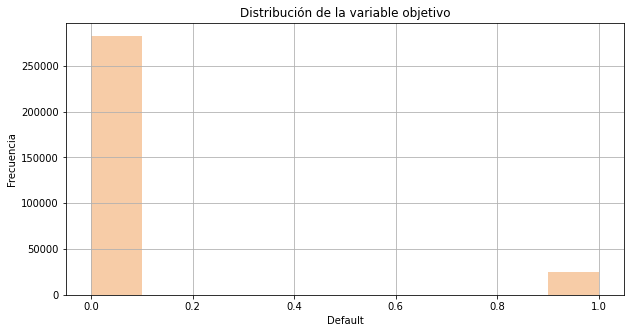

In [ ]:
# plt.hist(data_at['TARGET'],alpha=0.6, edgecolor = 'blue',  linewidth=0.6,rwidth=0.85)
plt.figure(figsize=(10,5))
plt.hist(y_train,alpha=0.6, color='#F2AB6D')
plt.title('Distribución de la variable objetivo')
plt.xlabel('Default')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

De lo anterior, se observa que en los datos de entrenamiento hay un porcentaje mucho mayor de datos de la clase 0 que de la clase 1, lo cual es indicativo de un problema de clases desbalanceadas

In [ ]:
print('''Porcentaje de datos de la clase 0: {}%
Porcentaje de datos de la clase 1: {}%'''.format(round(100*num_0/data_at.shape[0],2),round(100*num_1/data_at.shape[0],2)))

Porcentaje de datos de la clase 0: 91.93%
Porcentaje de datos de la clase 1: 8.07%


En el siguiente código mostrará el nombre de la variable, la descripción de dicha columna, el tipo de variable, los valores que toma dicha variable y el número de elementos nulos en dicha columna (se debe tener en cuenta que los valores nulos en este caso, solo cuenta como los datos que tienen un tipo None, NaN).

In [ ]:
l=[]
nulos=[]
for i in data_at.columns:
  l.append(data_at[i].unique())
for i in range(data_at.shape[1]):
  a=data_at[data_at.columns[i]].isnull().sum()
  nulos.append(a)
  b=list(data_col_desc[data_col_desc['Row']==data_at.columns[i]]['Description'].head(1))
  print(i,data_at.columns[i])
  print(b[0])
  print('Tipo de variable: ',data_at[data_at.columns[i]].dtypes)
  print(l[i])
  print('Se tienen {} valores nulos en esta columna'.format(a))
  print('Porcentaje de valores nulos en esta variable: ',round(100*a/data_at.size,4),'%')
  print('\n-------------------------------------------------------------------------\n')

0 SK_ID_CURR
ID of loan in our sample
Tipo de variable:  int64
[100002 100003 100004 ... 456253 456254 456255]
Se tienen 0 valores nulos en esta columna
Porcentaje de valores nulos en esta variable:  0.0 %

-------------------------------------------------------------------------

1 TARGET
Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
Tipo de variable:  int64
[1 0]
Se tienen 0 valores nulos en esta columna
Porcentaje de valores nulos en esta variable:  0.0 %

-------------------------------------------------------------------------

2 NAME_CONTRACT_TYPE
Identification if loan is cash or revolving
Tipo de variable:  object
['Cash loans' 'Revolving loans']
Se tienen 0 valores nulos en esta columna
Porcentaje de valores nulos en esta variable:  0.0 %

-------------------------------------------------------------------------

3 CODE_GENDER
Gender of 

In [ ]:
print('Porcentaje de valores nulos total, antes de análisis detallado: ',round(100*data_at.isnull().sum().sum()/data_at.size,4),'%')

Porcentaje de valores nulos total, antes de análisis detallado:  24.3959 %


Según los resultados anteriores, se analizará cada variable, para ver a cuales variables se le deben imputar datos o si no es necesario.

La variable NAME_CONTRACT_TYPE, la cual hace referencia a si el prestamo es en efectivo o no, no determinará si la persona caerá en default, por ende, esta variable se borra

In [ ]:
data_at=data_at.drop('NAME_CONTRACT_TYPE',axis=1)

La variable CODE_GENDER, la cual hace alución al género del cliente, no determinará si la persona caerá en default, por ende, esta variable se borra

In [ ]:
data_at=data_at.drop('CODE_GENDER',axis=1)

Las variables FLAG_OWN_CAR, FLAG_OWN_REALTY, EMERGENCYSTATE_MODE estan clasificadas como 'Y' o 'N', por tanto, se asigna 1 a yes y 0 a no

In [ ]:
data_at[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE']]=data_at[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE']].replace('Yes',1)
data_at[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE']]=data_at[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE']].replace('No',0)
data_at[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE']]=data_at[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE']].replace('Y',1)
data_at[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE']]=data_at[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE']].replace('N',0)

In [ ]:
print(data_at['FLAG_OWN_REALTY'].unique())
print(data_at['EMERGENCYSTATE_MODE'].unique())
print(data_at['FLAG_OWN_CAR'].unique())

[1 0]
[ 0. nan  1.]
[0 1]


La variable AMT_ANNUITY, la cual hace referencia a la anualidad de préstamo presenta unos valores nulos.

La variable AMT_GOODS_PRICE, la cual hace referencia a los préstamos al consumo, estos son los precios de los bienes por los que se otorga el préstamo, no determinará si la persona caerá en default, por ende, esta variable se borra

In [ ]:
data_at=data_at.drop('AMT_GOODS_PRICE',axis=1)

La variable NAME_TYPE_SUITE, la cual hace referencia a quién acompañaba al cliente cuando solicitaba el préstamo, no determinará si la persona caerá en default, por ende, esta variable se borra

In [ ]:
data_at=data_at.drop('NAME_TYPE_SUITE',axis=1)

La variable NAME_FAMILY_STATUS, la cual hace referencia al estado familiar del cliente, no determinará si la persona caerá en default, por ende, esta variable se borra

In [ ]:
data_at=data_at.drop('NAME_FAMILY_STATUS',axis=1)

La variable REGION_POPULATION_RELATIVE, la cual hace referencia a la población normakizada de la región donde vive el cliente, no determinará si la persona caerá en default, por ende, esta variable se borra

In [ ]:
data_at=data_at.drop('REGION_POPULATION_RELATIVE',axis=1)

La variable DAYS_BIRTH, la cual hace referencia a la edad del cliente en días se convierte a edad en años

In [ ]:
data_at['DAYS_BIRTH']=round(abs(data_at['DAYS_BIRTH'])/365.0,0)


Las variables DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL, las cuales hacen referencia a los días antes de la solicitud que el cliente cambió el registro, los días antes de la solicitud que el cliente cambió el documento de identidad, la edad del carro, se dio el teléfono móvil, se dio el teléfono del trabajo, el teléfono de la casa, se podía acceder al teléfono móvil proporcionado, el cliente proporciona un teléfono y un email, respectivamente; no determinarán si la persona caerá en default, por ende, estas variables se borran

In [ ]:
data_at=data_at.drop(['DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL'],axis=1)

La variable OCCUPATION_TYPE, la cual hace referencia a que tipo de ocupación tiene el cliente, tiene unos valores nulos.

Las variables 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', las cuales hacen referencia al número de miembros de la familia del cliente, calificación de la región donde vive el cliente, día de la solicitud, hora aproximada de la solicitud, coincidencia de las direcciones del cliente, respectivamente; no determinarán si la persona caerá en default, por ende, estas variables se borran

In [ ]:
data_at=data_at.drop(['CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE'],axis=1)

La variable EXT_SOURCE_1, la cual hace referencia a un puntaje estandarizado por un externo 1, tiene unos valores nulos.

La variable EXT_SOURCE_2, la cual hace referencia a un puntaje estandarizado por un externo 2, tiene unos valores nulos.

La variable EXT_SOURCE_3, la cual hace referencia a un puntaje estandarizado por un externo 3, tiene unos valores nulos.

La variable APARTMENTS_AVG, la cual hace referencia a un promedio  estandarizado del tamaño del apartamento donde reside el cliente, tiene unos valores nulos.

La variable BASEMENTAREA_AVG, la cual hace referencia a un promedio  estandarizado del área del apartamento donde reside el cliente, tiene unos valores nulos.

La variable YEARS_BEGINEXPLUATATION_AVG, la cual hace referencia a un promedio  estandarizado de hace cuantos años se exploró el area del apartamento donde reside el cliente, tiene unos valores nulos.

La variable YEARS_BUILD_AVG, la cual hace referencia a un promedio  estandarizado de cuantos años tiene la contrucción donde reside el cliente, tiene unos valores nulos.

La variable COMMONAREA_AVG, la cual hace referencia a un promedio  estandarizado del tamaño del área común donde reside el cliente, tiene unos valores nulos.

La variable ELEVATORS_AVG, la cual hace referencia a un promedio  estandarizado del número de ascensores del edificio donde reside el cliente, tiene unos valores nulos.

La variable ENTRANCES_AVG, la cual hace referencia a un promedio  estandarizado del número de entradas del edificio donde reside el cliente, tiene unos valores nulos.

La variable FLOORSMAX_AVG, la cual hace referencia a un promedio  estandarizado del número del piso máximo del edificio donde reside el cliente, tiene unos valores nulos.

La variable FLOORSMIN_AVG, la cual hace referencia a un promedio estandarizado del número del piso mínimo del edificio donde reside el cliente, tiene unos valores nulos.

La variable LANDAREA_AVG, la cual hace referencia a un promedio estandarizado del área terrestre donde reside el cliente, tiene unos valores nulos.

La variable LIVINGAPARTMENTS_AVG, la cual hace referencia a un promedio estandarizado del número de apartamentos habitados del edificio donde reside el cliente, tiene unos valores nulos.

La variable LIVINGAREA_AVG, la cual hace referencia a un promedio estandarizado del área habitada donde reside el cliente, tiene unos valores nulos.

La variable NONLIVINGAPARTMENTS_AVG, la cual hace referencia a un promedio estandarizado del número de apartamentos no habitados del edificio donde reside el cliente, tiene unos valores nulos.

La variable NONLIVINGAREA_AVG, la cual hace referencia a un promedio estandarizado del área no habitada donde reside el cliente, tiene unos valores nulos.

La variable APARTMENTS_MODE, la cual hace referencia a la moda estandarizada del tamaño del apartamento donde reside el cliente, tiene unos valores nulos.

La variable BASEMENTAREA_MODE, la cual hace referencia a la moda estandarizada del área del apartamento donde reside el cliente, tiene unos valores nulos.

La variable YEARS_BEGINEXPLUATATION_MODE, la cual hace referencia a la moda estandarizada de hace cuantos años se exploró el area del apartamento donde reside el cliente, tiene unos valores nulos.

La variable YEARS_BUILD_MODE, la cual hace referencia a la moda estandarizada de cuantos años tiene la contrucción donde reside el cliente, tiene unos valores nulos.

La variable COMMONAREA_MODE, la cual hace referencia a la moda estandarizada del tamaño del área común donde reside el cliente, tiene unos valores nulos.

La variable ELEVATORS_MODE, la cual hace referencia a la moda estandarizada del número de ascensores del edificio donde reside el cliente, tiene unos valores nulos.

La variable ENTRANCES_MODE, la cual hace referencia a la moda estandarizada del número de entradas del edificio donde reside el cliente, tiene unos valores nulos.

La variable FLOORSMAX_MODE, la cual hace referencia a la moda estandarizada del número del piso máximo del edificio donde reside el cliente, tiene unos valores nulos.

La variable FLOORSMIN_MODE, la cual hace referencia a la moda estandarizada del número del piso mínimo del edificio donde reside el cliente, tiene unos valores nulos.

La variable LANDAREA_MODE, la cual hace referencia a la moda estandarizada del área terrestre donde reside el cliente, tiene unos valores nulos.

La variable LIVINGAPARTMENTS_MODE, la cual hace referencia a la moda estandarizada del número de apartamentos habitados del edificio donde reside el cliente, tiene unos valores nulos.

La variable LIVINGAREA_MODE, la cual hace referencia a la moda estandarizada del área habitada donde reside el cliente, tiene unos valores nulos.

La variable NONLIVINGAPARTMENTS_MODE, la cual hace referencia a la moda estandarizada del número de apartamentos no habitados del edificio donde reside el cliente, tiene unos valores nulos.

La variable NONLIVINGAREA_MODE, la cual hace referencia a la moda estandarizada del área no habitada donde reside el cliente, tiene unos valores nulos.

La variable APARTMENTS_MEDI, la cual hace referencia a la mediana estandarizada del tamaño del apartamento donde reside el cliente, tiene unos valores nulos.

La variable BASEMENTAREA_MEDI, la cual hace referencia a la mediana estandarizada del área del apartamento donde reside el cliente, tiene unos valores nulos.

La variable YEARS_BEGINEXPLUATATION_MEDI, la cual hace referencia a la mediana estandarizada de hace cuantos años se exploró el area del apartamento donde reside el cliente, tiene unos valores nulos.

La variable YEARS_BUILD_MEDI, la cual hace referencia a la mediana estandarizada de cuantos años tiene la contrucción donde reside el cliente, tiene unos valores nulos.

La variable COMMONAREA_MEDI, la cual hace referencia a la mediana estandarizada del tamaño del área común donde reside el cliente, tiene unos valores nulos.

La variable ELEVATORS_MEDI, la cual hace referencia a la mediana estandarizada del número de ascensores del edificio donde reside el cliente, tiene unos valores nulos.

La variable ENTRANCES_MEDI, la cual hace referencia a la mediana estandarizada del número de entradas del edificio donde reside el cliente, tiene unos valores nulos.

La variable FLOORSMAX_MEDI, la cual hace referencia a la mediana estandarizada del número del piso máximo del edificio donde reside el cliente, tiene unos valores nulos.

La variable FLOORSMIN_MEDI, la cual hace referencia a la mediana estandarizada del número del piso mínimo del edificio donde reside el cliente, tiene unos valores nulos.

La variable LANDAREA_MEDI, la cual hace referencia a la mediana estandarizada del área terrestre donde reside el cliente, tiene unos valores nulos, los cuales se muestran a continuación.

La variable LIVINGAPARTMENTS_MEDI, la cual hace referencia a la mediana estandarizada del número de apartamentos habitados del edificio donde reside el cliente, tiene unos valores nulos.

La variable LIVINGAREA_MEDI, la cual hace referencia a la mediana estandarizada del área habitada donde reside el cliente, tiene unos valores nulos.

La variable NONLIVINGAPARTMENTS_MEDI, la cual hace referencia a la mediana estandarizada del número de apartamentos no habitados del edificio donde reside el cliente, tiene unos valores nulos.

La variable NONLIVINGAREA_MEDI, la cual hace referencia a la mediana estandarizada del área no habitada donde reside el cliente, tiene unos valores nulos.

La variable FONDKAPREMONT_MODE, la cual hace referencia a la moda estandarizada de ... tiene unos valores nulos.

La variable HOUSETYPE_MODE, la cual hace referencia a la moda estandarizada de tipo de casa, esta variable tiene unos valores nulos.

La variable TOTALAREA_MODE, la cual hace referencia a la moda estandarizada de el área total de la vivienda, esta variable tiene unos valores nulos.

La variable WALLSMATERIAL_MODE, la cual hace referencia a la moda estandarizada de material de los muros de la vivienda, esta variable tiene unos valores nulos.

La variable EMERGENCYSTATE_MODE, la cual hace referencia a la moda estandarizada de estado de emergencia, esta variable tiene unos valores nulos.

La variable OBS_30_CNT_SOCIAL_CIRCLE, la cual hace referencia a el número de  observaciones del entorno social del cliente con un incumplimiento observable de 30 días de atraso, esta variable tiene unos valores nulos.

La variable DEF_30_CNT_SOCIAL_CIRCLE, la cual hace referencia a el número de  observaciones del entorno social del cliente con un fallido de 30 días de demora, esta variable tiene unos valores nulos.

La variable OBS_60_CNT_SOCIAL_CIRCLE, la cual hace referencia a el número de  observaciones del entorno social del cliente con un incumplimiento observable de 60 días de atraso, esta variable tiene unos valores nulos.

La variable DEF_60_CNT_SOCIAL_CIRCLE, la cual hace referencia a el número de  observaciones del entorno social del cliente con un fallido de 60 días de demora, esta variable tiene unos valores nulos.

La variable DAYS_LAST_PHONE_CHANGE, la cual hace referencia a el número de  días antes de la aplicación que el cliente cambio el número de teléfono, no determinará si la persona caerá en default, por ende, esta variable se borra

In [ ]:
data_at=data_at.drop('DAYS_LAST_PHONE_CHANGE',axis=1)

Las variables 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', las cuales hacen referencia a los documentos entregados no determinarán si la persona caerá en default, por ende, estas variables se borran

In [ ]:
data_at=data_at.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],axis=1)

La variable AMT_REQ_CREDIT_BUREAU_HOUR, la cual hace referencia a el número de  consultas al Buró de Crédito sobre el cliente una hora antes de la solicitud, no determinará si la persona caerá en default, por ende, esta variable se borra

In [ ]:
data_at=data_at.drop('AMT_REQ_CREDIT_BUREAU_HOUR',axis=1)

La variable AMT_REQ_CREDIT_BUREAU_DAY, la cual hace referencia a el número de  consultas al Buró de Crédito sobre el cliente un día antes de la solicitud exceptuando las consultas de una hora antes de la solicitud, esta variable tiene varios valores nulos.

La variable AMT_REQ_CREDIT_BUREAU_WEEK, la cual hace referencia a el número de  consultas al Buró de Crédito sobre el cliente una semana antes de la solicitud exceptuando las consultas de un día antes de la solicitud, esta variable tiene varios valores nulos.

La variable AMT_REQ_CREDIT_BUREAU_MON, la cual hace referencia a el número de  consultas al Buró de Crédito sobre el cliente un mes antes de la solicitud exceptuando las consultas de una semana antes de la solicitud, esta variable tiene varios valores nulos.

La variable AMT_REQ_CREDIT_BUREAU_QRT, la cual hace referencia a el número de 
consultas al Buró de Crédito sobre el cliente tres meses antes de la solicitud exceptuando las consultas de un mes antes de la solicitud, esta variable tiene varios valores nulos.

La variable AMT_REQ_CREDIT_BUREAU_YEAR, la cual hace referencia a el número de  consultas al Buró de Crédito sobre el cliente un año antes de la solicitud exceptuando las consultas de los últimos 3 meses antes de la solicitud, esta variable tiene varios valores nulos.

Las variables que no se reportaron anteriormente, es porque no tenían nulos y son necesarias para el modelo. A continuación, se hará la transformación a las variables categóricas 

In [ ]:
data_at

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,House / apartment,26.0,-637,Laborers,2,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",0.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,State servant,Higher education,House / apartment,46.0,-1188,Core staff,1,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,House / apartment,52.0,-225,Laborers,2,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,1,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,House / apartment,52.0,-3039,Laborers,2,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,1,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,House / apartment,55.0,-3038,Core staff,2,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0,0,157500.0,254700.0,27558.0,Working,Secondary / secondary special,With parents,26.0,-236,Sales staff,1,0.145570,0.681632,NaN,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,0.1484,0.1965,0.0753,0.1095,0.10

In [ ]:
data_at=pd.get_dummies(data_at)

In [ ]:
data_at

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,...,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden
0,100002,1,0,1,0,202500.0,406597.5,24700.5,26.0,-637,2,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,...,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,46.0,-1188,1,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
2,100004,0,1,1,0,67500.0,135000.0,6750.0,52.0,-225,2,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,1,0,135000.0,312682.5,29686.5,52.0,-3039,2,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,1,0,121500.0,513000.0,21865.5,55.0,-3038,2,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0,0,157500.0,254700.0,27558.0,26.0,-236,1,0.145570,0.681632,NaN,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,0.1484,0.1965,0.0753,0.1095,0.1008,0.0172,0.9782,0.7125,0.0172,0.0806,0.0345,0.4583,0.0417,0.0094,0.0882,0.0853,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0

Una vez analizadas las variables detenidamente, se procede a la imputación de datos.

## 4.2.Data Sector Externo: Bureau & Bureau Balance

### Bureau

In [ ]:
bureau_original=bureau.copy()
bureau.head(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [ ]:
#Dimensión de la data
bureau_original.shape

(1716428, 17)

En el siguiente código mostrará el nombre de la variable, la descripción de dicha columna, el tipo de variable, los valores que toma dicha variable y el número de elementos nulos en dicha columna (se debe tener en cuenta que los valores nulos en este caso, solo cuenta como los datos que tienen un tipo None, NaN).


In [ ]:
#Bureau
l=[]
nulos=[]
for i in bureau.columns:
  l.append(bureau[i].unique())
for i in range(bureau.shape[1]):
  a=bureau[bureau.columns[i]].isnull().sum()
  nulos.append(a)
  print(i,bureau.columns[i])
  if bureau.columns[i] in data_col_desc['Row'].to_list():
    b=list(data_col_desc[data_col_desc['Row']==bureau.columns[i]]['Description'].head(1))
    print(b[0])   
  print('Tipo de variable: ',bureau[bureau.columns[i]].dtypes)
  print(l[i])
  print('Se tienen {} valores nulos en esta columna'.format(a))
  print('Porcentaje de valores nulos en esta variable: ',round(100*a/bureau.size,4),'%')
  print('\n-------------------------------------------------------------------------\n')

0 SK_ID_CURR
ID of loan in our sample
Tipo de variable:  int64
[215354 162297 402440 ... 448157 345866 235871]
Se tienen 0 valores nulos en esta columna
Porcentaje de valores nulos en esta variable:  0.0 %

-------------------------------------------------------------------------

1 SK_ID_BUREAU
Tipo de variable:  int64
[5714462 5714463 5714464 ... 5057762 5057770 5057778]
Se tienen 0 valores nulos en esta columna
Porcentaje de valores nulos en esta variable:  0.0 %

-------------------------------------------------------------------------

2 CREDIT_ACTIVE
Status of the Credit Bureau (CB) reported credits
Tipo de variable:  object
['Closed' 'Active' 'Sold' 'Bad debt']
Se tienen 0 valores nulos en esta columna
Porcentaje de valores nulos en esta variable:  0.0 %

-------------------------------------------------------------------------

3 CREDIT_CURRENCY
Recoded currency of the Credit Bureau credit
Tipo de variable:  object
['currency 1' 'currency 2' 'currency 4' 'currency 3']
Se tienen

In [ ]:
print('Porcentaje de valores nulos total, antes de análisis detallado: ',round(100*bureau.isnull().sum().sum()/bureau.size,4),'%')

Porcentaje de valores nulos total, antes de análisis detallado:  13.5026 %


Antes de comenzar a revisar los diferentes métodos de imputación de datos faltantes, se hace un preprocesamiento para dejar un regitro único de las variables relevantes por cada SKU

Row	Tratamiento
* CREDIT_ACTIVE	Nos interesa saber hacia el pasado cuántos créditos externos tiene activos, etctec
* CREDIT_CURRENCY	Eliminar columna? 
* DAYS_CREDIT	Obtener el min
* CREDIT_DAY_OVERDUE	Obtener el max
* DAYS_CREDIT_ENDDATE	Número máximo de días que aún debe afuera
* DAYS_ENDDATE_FACT	Días transcurridos entre la última vez que pagó. 
* AMT_CREDIT_MAX_OVERDUE	promedio de los máx
* CNT_CREDIT_PROLONG	Suma de solicitudes
* AMT_CREDIT_SUM	Suma adeudado afuera
* AMT_CREDIT_SUM_DEBT	Suma adeudado afuera
* AMT_CREDIT_SUM_LIMIT	
* AMT_CREDIT_SUM_OVERDUE	Convertir en dummy
* CREDIT_TYPE	
* DAYS_CREDIT_UPDATE	
* AMT_ANNUITY	
* SK_BUREAU_ID. Key
* MONTHS_BALANCE	Borrar. Info en bureau Balance
* STATUS	Borrar. Info en bureau Balance


In [ ]:
bureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


In [ ]:
bureau=bureau[['SK_ID_CURR',	'CREDIT_ACTIVE',	'DAYS_CREDIT',	'CREDIT_DAY_OVERDUE',	'DAYS_ENDDATE_FACT','AMT_CREDIT_MAX_OVERDUE'\
               ,'CNT_CREDIT_PROLONG','AMT_CREDIT_SUM','AMT_CREDIT_SUM_DEBT','AMT_CREDIT_SUM_LIMIT'	,'AMT_CREDIT_SUM_OVERDUE','CREDIT_TYPE','AMT_ANNUITY']]
bureau=pd.get_dummies(bureau)
bureau['DAYS_CREDIT']=abs(bureau['DAYS_CREDIT'])
bureau['DAYS_ENDDATE_FACT']=abs(bureau['DAYS_ENDDATE_FACT'])
a=bureau.groupby('SK_ID_CURR')['DAYS_CREDIT'].min()
b=bureau.groupby('SK_ID_CURR')['CREDIT_DAY_OVERDUE'].max()
c=bureau.groupby('SK_ID_CURR')['DAYS_ENDDATE_FACT'].min()
d=bureau.groupby('SK_ID_CURR')['AMT_CREDIT_MAX_OVERDUE'].max()
e=bureau.groupby('SK_ID_CURR')['CNT_CREDIT_PROLONG'].sum()
f=bureau.groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].sum()
g=bureau.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_DEBT'].sum()
h=bureau.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_LIMIT'].sum()
i=bureau.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_OVERDUE'].sum()
j=bureau.groupby('SK_ID_CURR')['AMT_ANNUITY'].max()
k=bureau.groupby('SK_ID_CURR')['CREDIT_ACTIVE_Active', 'CREDIT_ACTIVE_Bad debt', 'CREDIT_ACTIVE_Closed', 'CREDIT_ACTIVE_Sold', 'CREDIT_TYPE_Another type of loan', 'CREDIT_TYPE_Car loan', 'CREDIT_TYPE_Cash loan (non-earmarked)', 'CREDIT_TYPE_Consumer credit', 'CREDIT_TYPE_Credit card', 'CREDIT_TYPE_Interbank credit', 'CREDIT_TYPE_Loan for business development', 'CREDIT_TYPE_Loan for purchase of shares (margin lending)', 'CREDIT_TYPE_Loan for the purchase of equipment', 'CREDIT_TYPE_Loan for working capital replenishment', 'CREDIT_TYPE_Microloan', 'CREDIT_TYPE_Mobile operator loan', 'CREDIT_TYPE_Mortgage', 'CREDIT_TYPE_Real estate loan', 'CREDIT_TYPE_Unknown type of loan'].sum()
bureau=pd.concat([a,b,c,d,e,f,g,h,i,j,k],axis=1).reset_index()
bureau

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  from ipykernel import kernelapp as app


,SK_ID_CURR,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,AMT_ANNUITY,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
0,100001,49,0,544.0,NaN,0,1453365.000,596686.500,0.000,0.0,10822.5,3,0,4,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0
1,100002,103,0,36.0,5043.645,0,865055.565,245781.000,31988.565,0.0,0.0,2,0,6,0,0,0,0,4,4,0,0,0,0,0,0,0,0,0,0
2,100003,606,0,540.0,0.000,0,1017400.500,0.000,810000.000,0.0,NaN,1,0,3,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0
3,100004,408,0,382.0,0.000,0,189037.800,0.000,0.000,0.0,NaN,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
4,100005,62,0,123.0,0.000,0,657126.000,568408.500,0.000,0.0,4261.5,2,0,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305806,456249,483,0,291.0,18945.000,0,3693858.660,163071.000,0.000,0.0,NaN,2,0,11,0,1,0,0,9,3,0,0,0,0,0,0,0,0,0,0
305807,456250,760,0,760.0,0.000,0,3086459.550,2232040.095,58268.385,0.0,384147.0,2,0,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0
305808,456253,713,0,794.0,NaN,0,3960000.000,1795833.000,0.000,0.0,58369.5,2,0,2,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0
305809,456254,1104,0,859.0,NaN,0,45000.000,0.000,0.000,0.0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Unir a ID Unicos
DF_Final=pd.merge(data_at,bureau,on='SK_ID_CURR',how='left')
DF_Final.shape

(307511, 147)

### Bureau Balance

In [ ]:
bureau_b.head(5)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [ ]:
#Dimensión de la data
bureau_b.shape

(27299925, 3)

In [ ]:
#Bureau Balance
l=[]
nulos=[]
for i in bureau_b.columns:
  l.append(bureau_b[i].unique())
for i in range(bureau_b.shape[1]):
  a=bureau_b[bureau_b.columns[i]].isnull().sum()
  nulos.append(a)
  print(i,bureau_b.columns[i])
  if bureau_b.columns[i] in data_col_desc['Row'].to_list():
    b=list(data_col_desc[data_col_desc['Row']==bureau_b.columns[i]]['Description'].head(1))
    print(b[0])   
  print('Tipo de variable: ',bureau_b[bureau_b.columns[i]].dtypes)
  print(l[i])
  print('Se tienen {} valores nulos en esta columna'.format(a))
  print('Porcentaje de valores nulos en esta variable: ',round(100*a/bureau_b.size,4),'%')
  print('\n-------------------------------------------------------------------------\n')

0 SK_ID_BUREAU
Tipo de variable:  int64
[5715448 5715449 5715451 ... 5041172 5041332 5041336]
Se tienen 0 valores nulos en esta columna
Porcentaje de valores nulos en esta variable:  0.0 %

-------------------------------------------------------------------------

1 MONTHS_BALANCE
Month of balance relative to application date (-1 means the freshest balance date)
Tipo de variable:  int64
[  0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17
 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35
 -36 -37 -38 -39 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49 -50 -51 -52 -53
 -54 -55 -56 -57 -58 -59 -60 -61 -62 -63 -64 -65 -66 -67 -68 -69 -70 -71
 -72 -73 -74 -75 -76 -77 -78 -79 -80 -81 -82 -83 -84 -85 -86 -87 -88 -89
 -90 -91 -92 -93 -94 -95 -96]
Se tienen 0 valores nulos en esta columna
Porcentaje de valores nulos en esta variable:  0.0 %

-------------------------------------------------------------------------

2 STATUS
Status of Credit Bureau loan during

In [ ]:
print('Porcentaje de valores nulos total, antes de análisis detallado: ',round(100*bureau_b.isnull().sum().sum()/bureau_b.size,4),'%')

Porcentaje de valores nulos total, antes de análisis detallado:  0.0 %


Transformaciones requeridas

Se debe primero realizar un filtro de la variable months_balance, pues trae información de 8 años de antiguedad, lo cuál puede sesgar la predicción de default de un cliente teniendo en cuenta que no es un comportamiento que esté cercano a la actualidad real del cliente. Para ello, se acota esta variable únicamente hasta -24 para traer el comportamiento de los últimos 2 años. El segundo filtro corresponde a la variable Status of Credit Bureau, donde se deben dropear aquellos registros cuyo valor='X' (estado desconocido).
Finalmente, para obtener la información relevante por ID, se debe realizar: 
Por '1', '2','3','4' y '5', la cantidad de meses diferentes que cayeron en cada categoría de default. 


In [ ]:
bureau_b = bureau_b.apply(lambda x: x.str.strip() if x.dtype == "object" else x) #quito posibles espacios en blanco
bureau_b2=bureau_b[(bureau_b['MONTHS_BALANCE']>=-24) & (bureau_b['STATUS']!='X')] #Hago filtro

bureau_b2=bureau_b2.groupby(['SK_ID_BUREAU','STATUS'])['SK_ID_BUREAU'].nunique()
bureau_b2=bureau_b2.to_frame(name='Cant').reset_index()

bureau_f=bureau_original.iloc[:,[0,1]].merge(bureau_b2, on="SK_ID_BUREAU", how="inner")

In [ ]:
bureau_ff=bureau_f.groupby(['SK_ID_CURR','STATUS'])['SK_ID_BUREAU'].nunique()
bureau_ff=bureau_ff.to_frame(name='Cant').reset_index()

bureau_ff=bureau_ff.pivot(index='SK_ID_CURR',columns='STATUS',values='Cant').reset_index()
bureau_ff=bureau_ff.fillna(0)

bureau_ff.rename(columns={
                        'STATUS':'nro',
                        'SK_ID_CURR':'SK_ID_CURR',
                        '0':'0_ACTIVE',
                        '1':'1_MORA30',
                        '2':'2_MORA60',
                        '3':'3_MORA90',
                        '4':'4_MORA120',
                        '5':'5_MORA_s120',
                        'C':'C_CLOSED'
                        },
              #  index={0:'SK_ID_CURR'},
               inplace=True)
bureau_b_f=bureau_ff.reset_index()
bureau_b_f.head(5)

STATUS,index,SK_ID_CURR,0_ACTIVE,1_MORA30,2_MORA60,3_MORA90,4_MORA120,5_MORA_s120,C_CLOSED
0,0,100001,5.0,1.0,0.0,0.0,0.0,0.0,4.0
1,1,100002,6.0,5.0,0.0,0.0,0.0,0.0,5.0
2,2,100005,3.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,100010,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,100013,1.0,1.0,0.0,0.0,0.0,0.0,3.0


In [ ]:
bureau_b_f=bureau_b_f.drop('index',axis=1)

In [ ]:
#Unir a ID Unicos
DF_Final=pd.merge(DF_Final,bureau_b_f,on='SK_ID_CURR',how='left')
DF_Final.shape

(307511, 154)

## 4.3.Aplicaciones pasadas de los clientes en HomeCredit: previous_application

In [ ]:
prev_applic.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Dimensión de la data
prev_applic.shape

(1670214, 37)

En el siguiente código mostrará el nombre de la variable, la descripción de dicha columna, el tipo de variable, los valores que toma dicha variable y el número de elementos nulos en dicha columna (se debe tener en cuenta que los valores nulos en este caso, solo cuenta como los datos que tienen un tipo None, NaN).

In [ ]:
l=[]
nulos=[]
for i in prev_applic.columns:
  l.append(prev_applic[i].unique())
for i in range(prev_applic.shape[1]):
  a=prev_applic[prev_applic.columns[i]].isnull().sum()
  nulos.append(a)
  print(i,prev_applic.columns[i])
  if prev_applic.columns[i] in data_col_desc['Row'].to_list():
    b=list(data_col_desc[data_col_desc['Row']==prev_applic.columns[i]]['Description'].head(1))
    print(b[0])   
  print('Tipo de variable: ',prev_applic[prev_applic.columns[i]].dtypes)
  print(l[i])
  print('Se tienen {} valores nulos en esta columna'.format(a))
  print('Porcentaje de valores nulos en esta variable: ',round(100*a/prev_applic.size,4),'%')
  print('\n-------------------------------------------------------------------------\n')

0 SK_ID_PREV
Tipo de variable:  int64
[2030495 2802425 2523466 ... 2659632 2785582 2418762]
Se tienen 0 valores nulos en esta columna
Porcentaje de valores nulos en esta variable:  0.0 %

-------------------------------------------------------------------------

1 SK_ID_CURR
ID of loan in our sample
Tipo de variable:  int64
[271877 108129 122040 ... 253940 353284 191629]
Se tienen 0 valores nulos en esta columna
Porcentaje de valores nulos en esta variable:  0.0 %

-------------------------------------------------------------------------

2 NAME_CONTRACT_TYPE
Identification if loan is cash or revolving
Tipo de variable:  object
['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA']
Se tienen 0 valores nulos en esta columna
Porcentaje de valores nulos en esta variable:  0.0 %

-------------------------------------------------------------------------

3 AMT_ANNUITY
Loan annuity
Tipo de variable:  float64
[ 1730.43  25188.615 15060.735 ... 15708.15   8546.94  14704.29 ]
Se tienen 372235 

In [ ]:
print('Porcentaje de valores nulos total, antes de análisis detallado: ',round(100*prev_applic.isnull().sum().sum()/prev_applic.size,4),'%')

Porcentaje de valores nulos total, antes de análisis detallado:  17.9769 %


Transformaciones Requeridas

Primero: 
* De NAME_CONTRACT_STATUS Hacer conteo de cuántos créditos fueron denegados
* De NAME_CONTRACT_STATUS No tener en cuenta los créditos que fueron 'Canceled' 'Unused offer'
* De NAME_CONTRACT_STATUS, de los creditos que fueron aprobados: 


> * NAME_CONTRACT_TYPE -> Drop
> * AMT_ANNUITY--> Drop
> * AMT_APPLICATION --> Drop
> * AMT_CREDIT -> MAX AMT_CREDIT
> * AMT_DOWN_PAYMENT -> MAX
> * AMT_GOODS_PRICE -> Drop
> * WEEKDAY_APPR_PROCESS_START -> Drop
> * HOUR_APPR_PROCESS_START -> Drop
> * FLAG_LAST_APPL_PER_CONTRACT -> Drop
> * NFLAG_LAST_APPL_IN_DAY -> Drop
> * RATE_DOWN_PAYMENT -> Drop
> * RATE_INTEREST_PRIMARY -> Max
> * NAME_CASH_LOAN_PURPOSE -> Drop
> * DAYS_DECISION-> Drop
> * NAME_PAYMENT_TYPE -> Hacer one hot encoder para obtener 3 columnas, y después hacer una suma de agregación para obtener la info por cada variable de nuevo por ID único
> * CODE_REJECT_REASON -> Mismo tratamiento que > * name_payment_type
> * NAME_TYPE_SUITE-> Drop
> * NAME_CLIENT_TYPE-> Droop
> * NAME_GOODS_CATEGORY -> Mismo tratamiento que name payment type
> * NAME_PORTFOLIO-> Drop
> * NAME_PRODUCT_TYPE-> Drop
> * CHANNEL_TYPE -> Drop
> * SELLERPLACE_AREA -> Drop
> * NAME_SELLER_INDUSTRY-> Drop
> * CNT_PAYMENT->Maximo por id cliente
> * NAME_YIELD_GROUP-> Mismo tratamiento que NAME_PAYMENT_TYPE 
> * PRODUCT_COMBINATION-> Drop
> * DAYS_FIRST_DRAWING-> Drop
> * DAYS_FIRST_DUE-> Drop
> * DAYS_LAST_DUE_1ST_VERSION-> Drop
> * DAYS_LAST_DUE-> Drop
> * DAYS_TERMINATION-> Drop
> * NFLAG_INSURED_ON_APPROVAL -> Drop


In [ ]:
a=prev_applic.groupby(['SK_ID_CURR','NAME_CONTRACT_STATUS'])['NAME_CONTRACT_STATUS'].nunique().to_frame(name='Cant')\
.reset_index().pivot(index='SK_ID_CURR',columns='NAME_CONTRACT_STATUS',values='Cant').fillna(0)
a=a[['Approved','Refused']]
b=prev_applic[prev_applic['NAME_CONTRACT_STATUS']=='Approved'].groupby(['SK_ID_CURR','NAME_CONTRACT_STATUS'])['CNT_PAYMENT','AMT_CREDIT',\
                                                                                        'AMT_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY'].max()
c=prev_applic[['SK_ID_CURR','NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_GOODS_CATEGORY', 'NAME_YIELD_GROUP']].replace('XNA',np.nan)
c=pd.get_dummies(c).groupby('SK_ID_CURR').sum()
prev_applic1=pd.merge(a,b,on='SK_ID_CURR',how='left')
prev_applic=pd.merge(prev_applic1,c,on='SK_ID_CURR',how='left').reset_index()
prev_applic.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,SK_ID_CURR,Approved,Refused,CNT_PAYMENT,AMT_CREDIT,AMT_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,NAME_PAYMENT_TYPE_Cash through the bank,NAME_PAYMENT_TYPE_Cashless from the account of the employer,NAME_PAYMENT_TYPE_Non-cash from your account,CODE_REJECT_REASON_CLIENT,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_LIMIT,CODE_REJECT_REASON_SCO,CODE_REJECT_REASON_SCOFR,CODE_REJECT_REASON_SYSTEM,CODE_REJECT_REASON_VERIF,CODE_REJECT_REASON_XAP,NAME_GOODS_CATEGORY_Additional Service,NAME_GOODS_CATEGORY_Animals,NAME_GOODS_CATEGORY_Audio/Video,NAME_GOODS_CATEGORY_Auto Accessories,NAME_GOODS_CATEGORY_Clothing and Accessories,NAME_GOODS_CATEGORY_Computers,NAME_GOODS_CATEGORY_Construction Materials,NAME_GOODS_CATEGORY_Consumer Electronics,NAME_GOODS_CATEGORY_Direct Sales,NAME_GOODS_CATEGORY_Education,NAME_GOODS_CATEGORY_Fitness,NAME_GOODS_CATEGORY_Furniture,NAME_GOODS_CATEGORY_Gardening,NAME_GOODS_CATEGORY_Homewares,NAME_GOODS_CATEGORY_House Construction,NAME_GOODS_CATEGORY_Insurance,NAME_GOODS_CATEGORY_Jewelry,NAME_GOODS_CATEGORY_Medical Supplies,NAME_GOODS_CATEGORY_Medicine,NAME_GOODS_CATEGORY_Mobile,NAME_GOODS_CATEGORY_Office Appliances,NAME_GOODS_CATEGORY_Other,NAME_GOODS_CATEGORY_Photo / Cinema Equipment,NAME_GOODS_CATEGORY_Sport and Leisure,NAME_GOODS_CATEGORY_Tourism,NAME_GOODS_CATEGORY_Vehicles,NAME_GOODS_CATEGORY_Weapon,NAME_YIELD_GROUP_high,NAME_YIELD_GROUP_low_action,NAME_YIELD_GROUP_low_normal,NAME_YIELD_GROUP_middle
0,100001,1.0,0.0,8.0,23787.0,2520.0,NaN,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,100002,1.0,0.0,24.0,179055.0,0.0,NaN,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,100003,1.0,0.0,12.0,1035882.0,6885.0,NaN,2,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2


In [ ]:
#Unir a ID Unicos
DF_Final=pd.merge(DF_Final,prev_applic,on='SK_ID_CURR',how='left')
DF_Final.shape

(307511, 201)

## 4.4.Comportamiento de los clientes en créditos orotgados anteriormente: installments_payments

In [ ]:
i_pay.head(5)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [ ]:
#Dimensión de la data
i_pay.shape

(13605401, 8)

En el siguiente código mostrará el nombre de la variable, la descripción de dicha columna, el tipo de variable, los valores que toma dicha variable y el número de elementos nulos en dicha columna (se debe tener en cuenta que los valores nulos en este caso, solo cuenta como los datos que tienen un tipo None, NaN).


In [ ]:
l=[]
nulos=[]
for i in i_pay.columns:
  l.append(i_pay[i].unique())
for i in range(i_pay.shape[1]):
  a=i_pay[i_pay.columns[i]].isnull().sum()
  nulos.append(a)
  print(i,i_pay.columns[i])
  if i_pay.columns[i] in data_col_desc['Row'].to_list():
    b=list(data_col_desc[data_col_desc['Row']==i_pay.columns[i]]['Description'].head(1))
    print(b[0])   
  print('Tipo de variable: ',i_pay[i_pay.columns[i]].dtypes)
  print(l[i])
  print('Se tienen {} valores nulos en esta columna'.format(a))
  print('Porcentaje de valores nulos en esta variable: ',round(100*a/i_pay.size,4),'%')
  print('\n-------------------------------------------------------------------------\n')

0 SK_ID_PREV
Tipo de variable:  int64
[1054186 1330831 2085231 ... 1984920 1946334 1276288]
Se tienen 0 valores nulos en esta columna
Porcentaje de valores nulos en esta variable:  0.0 %

-------------------------------------------------------------------------

1 SK_ID_CURR
ID of loan in our sample
Tipo de variable:  int64
[161674 151639 193053 ... 413433 434445 405063]
Se tienen 0 valores nulos en esta columna
Porcentaje de valores nulos en esta variable:  0.0 %

-------------------------------------------------------------------------

2 NUM_INSTALMENT_VERSION
Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed
Tipo de variable:  float64
[  1.   0.   2.   4.   3.   5.   7.   8.   6.  13.   9.  21.  22.  12.
  17.  18.  11.  14.  34.  33.  19.  16.  15.  10.  26.  27.  20.  25.
  23.  24.  31.  32.  28.  35.  29.  30.  43.  39.  40.  36.  41.  42.
  3

In [ ]:
print('Porcentaje de valores nulos total, antes de análisis detallado: ',round(100*i_pay.isnull().sum().sum()/i_pay.size,4),'%')

Porcentaje de valores nulos total, antes de análisis detallado:  0.0053 %


Transformaciones Requeridas

* Sacar una velocidad entre NUM_INSTALMENT_VERSION y NUM_INSTALMENT_NUMBER: 
pactado_real= Promedio de abs(NUM_INSTALMENT_NUMBER/ NUM_INSTALMENT_VERSION)
Interpretación: Cuántas veces cabe el tiempo en que realidad pagué en el número total pactado. Entre más grande el número significa que era un cliente prepagador. Si es inferior a 1, da indicio de clientes que se colgaron en el plazo pactado
* Hacer lo mismo para: DAYS_INSTALMENT/DAYS_ENTRY_PAYMENT, AMT_PAYMENT/AMT_INSTALMENT


In [ ]:
i_pay2=i_pay.groupby('SK_ID_CURR')['NUM_INSTALMENT_VERSION','NUM_INSTALMENT_NUMBER','DAYS_INSTALMENT','DAYS_ENTRY_PAYMENT','AMT_INSTALMENT','AMT_PAYMENT'].mean().reset_index()
i_pay2=i_pay2.assign(ind_vel_cuotas_cr=abs(i_pay2['NUM_INSTALMENT_NUMBER']/i_pay2['NUM_INSTALMENT_VERSION']))
i_pay2=i_pay2.assign(ind_vel_tpago_cr=abs(i_pay2['DAYS_INSTALMENT'])/abs(i_pay2['DAYS_ENTRY_PAYMENT']))
i_pay2=i_pay2.assign(ind_vel_monto_cr=abs(i_pay2['AMT_INSTALMENT'])/abs(i_pay2['AMT_PAYMENT']))
i_pay2.replace([np.inf, -np.inf], np.nan,inplace=True)
i_pay2.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,ind_vel_cuotas_cr,ind_vel_tpago_cr,ind_vel_monto_cr
0,100001,1.142857,2.714286,-2187.714286,-2195.000000,5885.132143,5885.132143,2.375000,0.996681,1.0
1,100002,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105,9.500000,0.935258,1.0
2,100003,1.040000,5.080000,-1378.160000,-1385.320000,64754.586000,64754.586000,4.884615,0.994832,1.0
3,100004,1.333333,2.000000,-754.000000,-761.666667,7096.155000,7096.155000,1.500000,0.989934,1.0
4,100005,1.111111,5.000000,-586.000000,-609.555556,6240.205000,6240.205000,4.500000,0.961356,1.0


In [ ]:
#Unir a ID Unicos
DF_Final=pd.merge(DF_Final,i_pay2,on='SK_ID_CURR',how='left')
DF_Final.shape

(307511, 163)

## 4.5.Comportamiento en tarjetas de crédito: credit_card_balance

In [ ]:
cc_b.head(5)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [ ]:
#Dimensión de la data
cc_b.shape

(3840312, 23)

En el siguiente código mostrará el nombre de la variable, la descripción de dicha columna, el tipo de variable, los valores que toma dicha variable y el número de elementos nulos en dicha columna (se debe tener en cuenta que los valores nulos en este caso, solo cuenta como los datos que tienen un tipo None, NaN).


In [ ]:
l=[]
nulos=[]
for i in cc_b.columns:
  l.append(cc_b[i].unique())
for i in range(cc_b.shape[1]):
  a=cc_b[cc_b.columns[i]].isnull().sum()
  nulos.append(a)
  print(i,cc_b.columns[i])
  if cc_b.columns[i] in data_col_desc['Row'].to_list():
    b=list(data_col_desc[data_col_desc['Row']==cc_b.columns[i]]['Description'].head(1))
    print(b[0])   
  print('Tipo de variable: ',cc_b[cc_b.columns[i]].dtypes)
  print(l[i])
  print('Se tienen {} valores nulos en esta columna'.format(a))
  print('Porcentaje de valores nulos en esta variable: ',round(100*a/cc_b.size,4),'%')
  print('\n-------------------------------------------------------------------------\n')

0 SK_ID_PREV
Tipo de variable:  int64
[2562384 2582071 1740877 ... 1897864 2481982 2191610]
Se tienen 0 valores nulos en esta columna
Porcentaje de valores nulos en esta variable:  0.0 %

-------------------------------------------------------------------------

1 SK_ID_CURR
ID of loan in our sample
Tipo de variable:  int64
[378907 363914 371185 ... 174455 315041 382749]
Se tienen 0 valores nulos en esta columna
Porcentaje de valores nulos en esta variable:  0.0 %

-------------------------------------------------------------------------

2 MONTHS_BALANCE
Month of balance relative to application date (-1 means the freshest balance date)
Tipo de variable:  int64
[ -6  -1  -7  -4  -5  -3  -2 -19 -13 -18 -15 -12 -22 -16 -21 -14 -20 -17
 -11 -52 -54 -58 -53 -51 -50 -59 -56 -57 -60 -55 -26 -25 -24 -23 -67 -64
 -62 -63 -61 -65 -66 -10  -9 -88 -95 -86 -89 -91 -93 -87 -90 -92 -94 -85
 -72 -73 -70 -69 -68 -71 -74  -8 -27 -80 -79 -84 -83 -81 -82 -96 -28 -36
 -31 -32 -40 -41 -35 -34 -39 -33 -37 -

In [ ]:
print('Porcentaje de valores nulos total, antes de análisis detallado: ',round(100*cc_b.isnull().sum().sum()/cc_b.size,4),'%')

Porcentaje de valores nulos total, antes de análisis detallado:  6.6541 %


Transformaciones Requeridas

Hacer filtro para los últimos: MONTHS_BALANCE <=6
* Sacar la utilización promedio: PROMEDIO(ABS(AMT_Balance)/ AMT_CREDIT_LIMIT_ACTUAL)
* Para MONTHS_BALANCE <=6, sacar el coeficiente de variación promedio de la utilización
* AMT_INST_MIN_REGULARITY/AMT_PAYMENT_CURRENT: Indice de si está pagando a la par, más o menos de lo que debería 
* AMT_PAYMENT_TOTAL_CURRENT -> drop
* AMT_RECEIVABLE_PRINCIPAL-> drop
* AMT_RECIVABLE -> Drop
* AMT_TOTAL_RECEIVABLE -> drop
* CNT_DRAWINGS_ATM_CURRENT -> Sacar un promedio para los ult 6 meses
* CNT_DRAWINGS_CURRENT + CNT_DRAWINGS_OTHER_CURRENT-> Sacar un promedio para los ult 6 meses
* CNT_INSTALMENT_MATURE_CUM -> Sacar un promedio para los ult 6 meses
* NAME_CONTRACT_STATUS -> Hacer conteode cuántas están en demand, y cuántas fueron refused, y cuántas están active + approved
* SK_DPD-> hacer un máx de los últ 6 meses
* SK_DPD_DEF -> drop


In [ ]:
cc_b=cc_b[cc_b['MONTHS_BALANCE']>-6]
cc_b['AVG_USED']=abs(cc_b.AMT_BALANCE)/cc_b.AMT_CREDIT_LIMIT_ACTUAL
cc_b['T_CNT_DRAWINGS']=cc_b['CNT_DRAWINGS_CURRENT']+cc_b['CNT_DRAWINGS_OTHER_CURRENT']
cc_b['INDEX_PAY']=cc_b['AMT_INST_MIN_REGULARITY']/cc_b['AMT_PAYMENT_CURRENT']
cc_b=cc_b.drop(['SK_ID_PREV','SK_DPD_DEF', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE'],axis=1)
a=((cc_b.groupby('SK_ID_CURR')['AVG_USED'].std())/(cc_b.groupby('SK_ID_CURR')['AVG_USED'].mean())).to_frame(name='CV_AVG_USED')
b=cc_b.groupby('SK_ID_CURR')['CNT_DRAWINGS_ATM_CURRENT',\
                             'T_CNT_DRAWINGS','CNT_INSTALMENT_MATURE_CUM'].mean()
c=cc_b.groupby(['SK_ID_CURR','NAME_CONTRACT_STATUS'])\
['NAME_CONTRACT_STATUS'].count().to_frame('Cant').reset_index()\
.pivot(index='SK_ID_CURR',columns='NAME_CONTRACT_STATUS',values='Cant').fillna(0)
d=cc_b.groupby('SK_ID_CURR')['SK_DPD'].max().to_frame(name='MAX_SK_DPD')
cc_b=pd.concat([a,b,c,d],axis=1).reset_index()
cc_b.head(3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,SK_ID_CURR,CV_AVG_USED,CNT_DRAWINGS_ATM_CURRENT,T_CNT_DRAWINGS,CNT_INSTALMENT_MATURE_CUM,Active,Completed,Demand,Signed,MAX_SK_DPD
0,100006,NaN,NaN,NaN,0.0,5.0,0.0,0.0,0.0,0
1,100011,NaN,0.0,0.0,33.0,4.0,0.0,0.0,0.0,0
2,100013,NaN,0.0,0.0,22.0,5.0,0.0,0.0,0.0,0


In [ ]:
#Unir a ID Unicos
DF_Final=pd.merge(DF_Final,cc_b,on='SK_ID_CURR',how='left')
DF_Final.shape

(307511, 172)

## 4.6. Balance de los clientes previos a la aplicación: POS_CASH_balance

In [ ]:
pos_cash_b.head(5)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [ ]:
#Dimensión de la data
pos_cash_b.shape

(10001358, 8)

En el siguiente código mostrará el nombre de la variable, la descripción de dicha columna, el tipo de variable, los valores que toma dicha variable y el número de elementos nulos en dicha columna (se debe tener en cuenta que los valores nulos en este caso, solo cuenta como los datos que tienen un tipo None, NaN).


In [ ]:
l=[]
nulos=[]
for i in pos_cash_b.columns:
  l.append(pos_cash_b[i].unique())
for i in range(pos_cash_b.shape[1]):
  a=pos_cash_b[pos_cash_b.columns[i]].isnull().sum()
  nulos.append(a)
  print(i,pos_cash_b.columns[i])
  if pos_cash_b.columns[i] in data_col_desc['Row'].to_list():
    b=list(data_col_desc[data_col_desc['Row']==pos_cash_b.columns[i]]['Description'].head(1))
    print(b[0])   
  print('Tipo de variable: ',pos_cash_b[pos_cash_b.columns[i]].dtypes)
  print(l[i])
  print('Se tienen {} valores nulos en esta columna'.format(a))
  print('Porcentaje de valores nulos en esta variable: ',round(100*a/pos_cash_b.size,4),'%')
  print('\n-------------------------------------------------------------------------\n')

0 SK_ID_PREV
Tipo de variable:  int64
[1803195 1715348 1784872 ... 2452932 1980876 2308284]
Se tienen 0 valores nulos en esta columna
Porcentaje de valores nulos en esta variable:  0.0 %

-------------------------------------------------------------------------

1 SK_ID_CURR
ID of loan in our sample
Tipo de variable:  int64
[182943 367990 397406 ... 394310 240059 144536]
Se tienen 0 valores nulos en esta columna
Porcentaje de valores nulos en esta variable:  0.0 %

-------------------------------------------------------------------------

2 MONTHS_BALANCE
Month of balance relative to application date (-1 means the freshest balance date)
Tipo de variable:  int64
[-31 -33 -32 -35 -38 -39 -34 -41 -37 -40 -43 -36 -42 -47 -44 -46 -45 -27
 -25 -24 -30 -28 -26 -29 -48 -15 -19 -22 -14 -18 -16 -21 -17 -20 -23  -1
  -6  -2  -3  -5  -4 -13 -11 -10  -9  -7  -8 -54 -49 -52 -53 -50 -51 -55
 -12 -94 -95 -92 -91 -96 -93 -57 -64 -56 -59 -60 -66 -65 -58 -63 -62 -61
 -87 -86 -88 -89 -90 -72 -74 -73 -82 -

In [ ]:
print('Porcentaje de valores nulos total, antes de análisis detallado: ',round(100*pos_cash_b.isnull().sum().sum()/pos_cash_b.size,4),'%')

Porcentaje de valores nulos total, antes de análisis detallado:  0.0652 %


Transformaciones Requeridas

* Filtro: MONTHS_BALANCE <=24
* CNT_INSTALMENT--> Max
* CNT_INSTALMENT_FUTURE -> Max
* NAME_CONTRACT_STATUS-> Conteo de cuántos quedan en Demand,Amortized debt
* SK_DPD --> Max. Pero hacerlo en los últimos 6 meses
* SK_DPD_DEF -> Drop



In [ ]:
pos_cash_b=pos_cash_b[pos_cash_b['MONTHS_BALANCE'] >=-24]
a=pos_cash_b.groupby('SK_ID_CURR')['CNT_INSTALMENT','CNT_INSTALMENT_FUTURE'].max()
pos_cash_b['NAME_CONTRACT_STATUS']=pos_cash_b['NAME_CONTRACT_STATUS'].replace('XNA',np.nan)
b=pos_cash_b.groupby(['SK_ID_CURR','NAME_CONTRACT_STATUS'])\
['NAME_CONTRACT_STATUS'].count().to_frame('Cant').reset_index()\
.pivot(index='SK_ID_CURR',columns='NAME_CONTRACT_STATUS',values='Cant').fillna(0)
c=pos_cash_b[pos_cash_b['MONTHS_BALANCE'] >=-6].groupby('SK_ID_CURR')['SK_DPD'].max().to_frame('MAX_SK_DPD')
pos_cash_b=pd.concat([a,b,c],axis=1).reset_index()
pos_cash_b.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,SK_ID_CURR,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,Active,Amortized debt,Approved,Canceled,Completed,Demand,Returned to the store,Signed,MAX_SK_DPD
0,100002,24.0,24.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,12.0,11.0,9.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,NaN
2,100004,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
3,100005,12.0,12.0,9.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
4,100006,48.0,48.0,18.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0


In [ ]:
#Unir a ID Unicos
DF_Final=pd.merge(DF_Final,pos_cash_b,on='SK_ID_CURR',how='left')
DF_Final.shape

(307511, 183)

In [ ]:
from google.colab import files
DF_Final.to_csv('01-DF_Final_1ra_Iter.csv') 
files.download('01-DF_Final_1ra_Iter.csv')